# Heart DEEPLEARNING 

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
file_path = 'D:/K1_nam4/인공지능개론/artificial-intelligence/AI_class/artificial-intelligence/week5/dataFrame/heart.csv'

In [45]:
df = pd.read_csv(file_path)
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [49]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [50]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [51]:
X = df.drop('target', axis=1)
y = df['target']

In [52]:
X = X.values

In [53]:
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [54]:
y = pd.get_dummies(y).values

In [55]:
print(y[:5])

[[False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)


In [57]:
# 데이터 정규화
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-1.35679832,  0.72250438,  0.00809909, -0.61685555,  0.91403366,
        -0.38330071,  0.8431327 ,  0.53278078, -0.67663234, -0.92086403,
         0.95390513, -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094,  1.1694912 ,  0.43952674,
        -0.38330071, -1.04610909, -1.75358236,  1.47790748, -0.19378705,
         0.95390513, -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912,  1.1694912 , -0.30070405,
        -0.38330071,  0.8431327 , -0.13967897, -0.67663234,  2.3509824 ,
        -0.69498803, -0.68970073, -0.50904773],
       [ 0.05848269, -1.38407465,  0.00809909,  0.27631782,  0.0599212 ,
        -0.38330071, -1.04610909,  0.48795013, -0.67663234,  0.35152069,
        -0.69498803, -0.68970073, -0.50904773],
       [ 0.60282153,  0.72250438, -0.97189094, -0.79549023, -0.31968433,
         2.60891771,  0.8431327 ,  0.44311948,  1.47790748,  0.35152069,
         0.95390513,  1.33342142,  1.17848036]])

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242, 2), (61, 2))

In [59]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 이진 분류 이므로 sigmoid 사용 
])



In [60]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [61]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2630 - mse: 0.2630 - val_loss: 0.2593 - val_mse: 0.2593
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2584 - mse: 0.2584 - val_loss: 0.2564 - val_mse: 0.2564
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2556 - mse: 0.2556 - val_loss: 0.2549 - val_mse: 0.2549
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2542 - mse: 0.2542 - val_loss: 0.2540 - val_mse: 0.2540
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2533 - mse: 0.2533 - val_loss: 0.2534 - val_mse: 0.2534
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2525 - mse: 0.2525 - val_loss: 0.2528 - val_mse: 0.2528
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2524 - mse: 0.2524 - val_loss: 0.2524 - val_mse: 0.2524
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2520 - mse: 0.2520 - val_loss: 0.2521 - val_mse: 0.2521
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2517 - mse: 0.2517 - val_loss

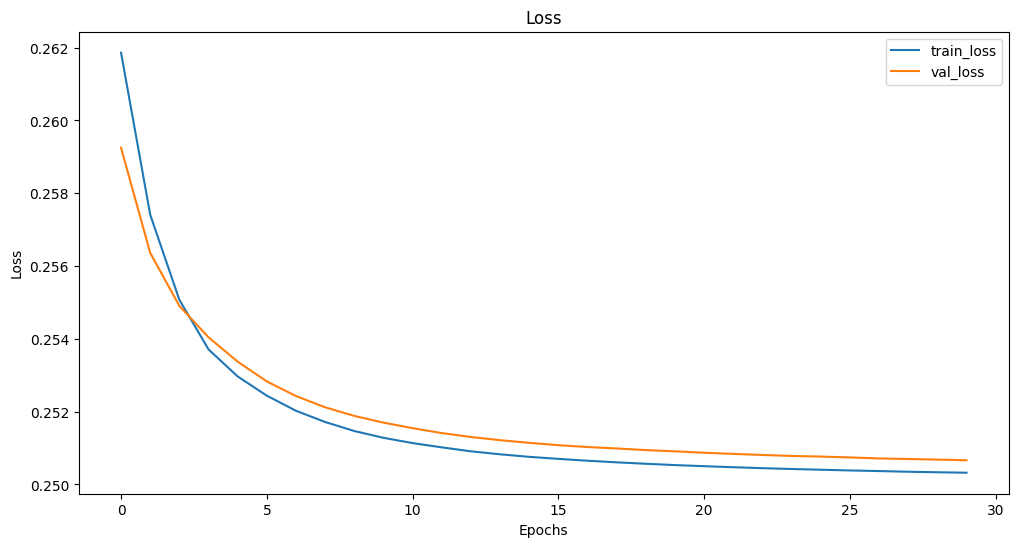

In [62]:
# loss check
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

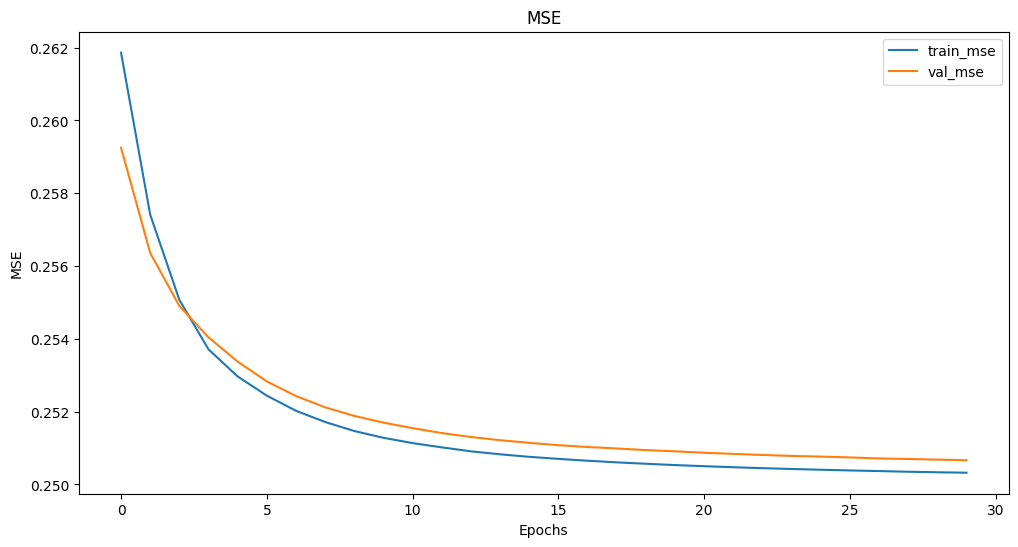

In [63]:
# mse check
plt.figure(figsize=(12, 6))
plt.plot(history.history['mse'], label='train_mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.title('MSE')
plt.xlabel('Epochs') 
plt.ylabel('MSE')
plt.legend()
plt.show()

In [64]:
# HEART MACHINE LEARNING

In [65]:
df = pd.read_csv(file_path)
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [69]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [70]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [71]:
X = df.drop('target', axis=1)
y = df['target']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [73]:
# 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [75]:
# Decision Tree Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.7541


In [76]:

# Decision Tree Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)



Confusion Matrix:
[[25  4]
 [11 21]]


In [77]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [78]:

# Random Forest Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.8361


In [79]:

# Random Forest Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[24  5]
 [ 5 27]]


In [80]:
# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [81]:

# SVM Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

SVM Accuracy: 0.8689


In [82]:

# SVM Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[26  3]
 [ 5 27]]


In [83]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [84]:
# Logistic Regression Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8525


In [85]:
# Logistic Regression Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[25  4]
 [ 5 27]]


In [86]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [87]:
# KNN Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

KNN Accuracy: 0.9016


In [88]:
# KNN Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[27  2]
 [ 4 28]]
